### 1- Data preprocessing and visualization

In [1]:
import pandas as pd
hd=pd.read_csv('kc_house_data.csv')
hd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1-1 Preprocessing

In [3]:
hd.isnull().sum().sum()

0

In [4]:
# --> No NaNs to clean . 

In [5]:
# No categorical data to transform

In [6]:
hd.drop('id',axis=1,inplace=True)    # dropping the id column because it's not a useful feature . 
hd.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Features selection : Before moving to the visualization part , we're going to select the features that correlate well 
# with our output(price) . For that , we're going to use the correlation map .

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 15, 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 10 }

        )

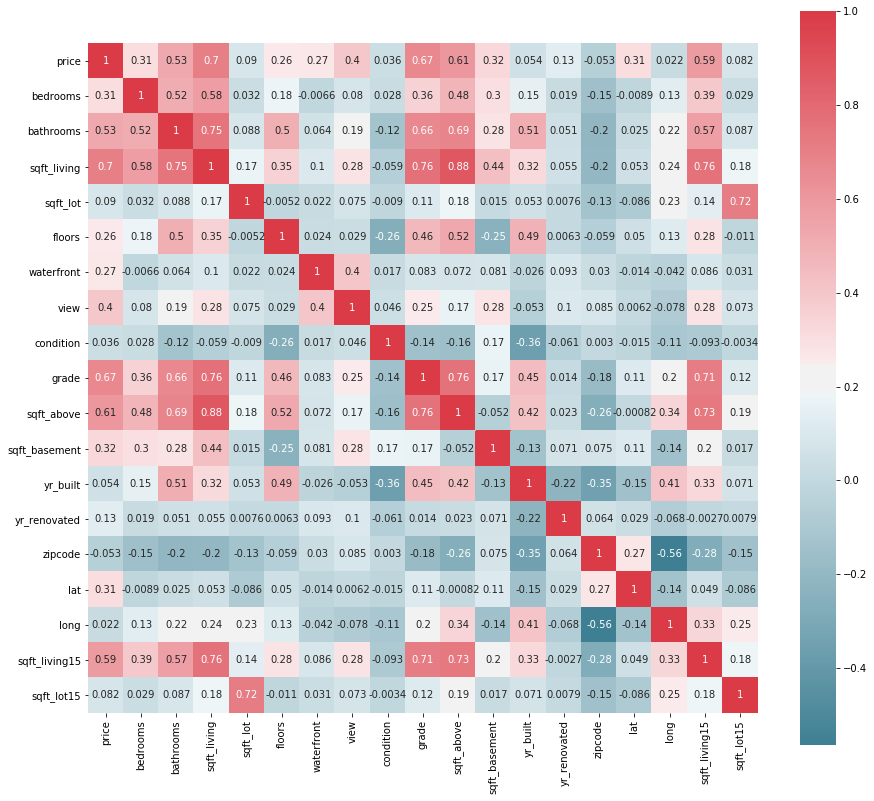

In [14]:
plot_correlation_map(hd)

In [15]:
# we will retain the features which represent a correlation coefficient (WITH THE PRICE) > 0,5 . As shown in the correlation
# map, those are :
# sqft_living15(0.59)
# sqft_above(0.61)
# grade(0.67)
# sqft_living(0.7)
# bathrooms(0.53)

2-2 Visualization

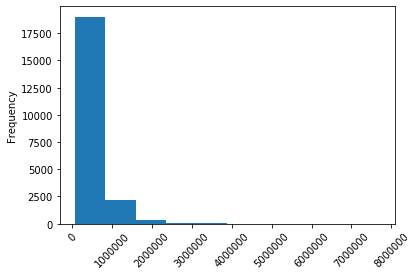

In [16]:
hd['price'].plot.hist(rot=45)

In [ ]:
# Most of the house prices are below 1000000 

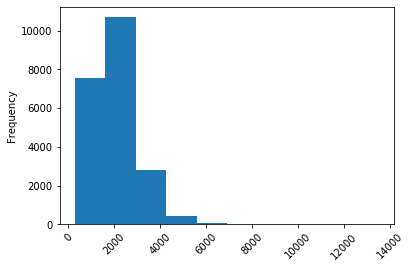

In [17]:
hd['sqft_living'].plot.hist(rot=45)

In [18]:
# Most of the house surfaces are below 4000 sqft . 

In [24]:
#visualize the box plots of the features selected above to detect outliers . 

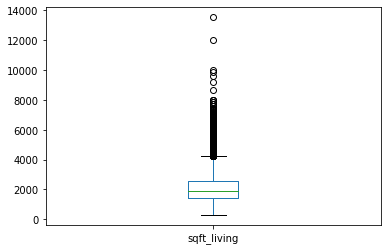

In [25]:
hd['sqft_living'].plot.box()

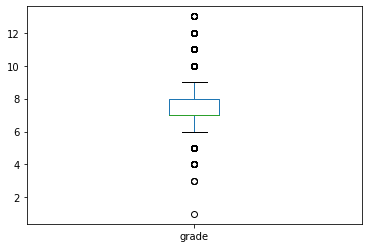

In [27]:
hd['grade'].plot.box()

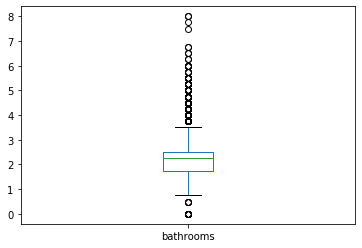

In [28]:
hd['bathrooms'].plot.box()

In [ ]:
# The box plots above show manu outliers that will badly impact our regression model --> we should then remove those outliers

In [78]:
# removing the outliers
hd1=hd[['price','sqft_living','sqft_above','grade','sqft_living15','bathrooms']] 
# hd1 is the dataset that we need now (we only need the output and the 
# features that we've chosen in the features selection part )
import numpy as np 
import scipy.stats
z_scores = scipy.stats.zscore(hd1)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_hd = hd1[filtered_entries]

In [79]:
new_hd.head()   #  All the inputs now are more suitable for regression because all the outliers have been removed . 

,price,sqft_living,sqft_above,grade,sqft_living15,bathrooms
0,221900.0,1180,1180,7,1340,1.00
1,538000.0,2570,2170,7,1690,2.25
2,180000.0,770,770,6,2720,1.00
3,604000.0,1960,1050,7,1360,3.00
4,510000.0,1680,1680,8,1800,2.00


### 2- Regression part

In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [42]:
# Splitting data to test_data and train_data
x=new_hd['sqft_living'].values[:,np.newaxis]   # The input that we will use in the linear-regression model is the one that
                                                # that represented the highest correlation with the output ( 0.7)
y=new_hd['price'].values  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [52]:
# creating the linear regression model
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

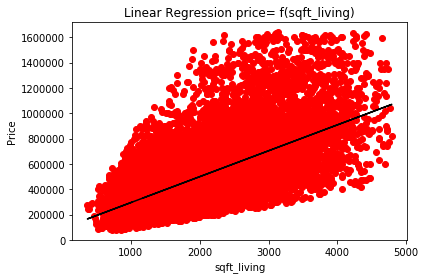

In [53]:
# plotting the linear regression
plt.scatter(x,y,color="r")
plt.title("Linear Regression price= f(sqft_living)")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [54]:
#testing the performance of the linear regression model 
MSE_linear=mean_squared_error(y_test,predicted)
r2_linear=metrics.r2_score(y_test,predicted)
print('MSE_linear is :',MSE_linear)
print('r2_linear is :',r2_linear)

MSE_linear is : 37447069657.26568
r2_linear is : 0.3946047463111204


In [46]:
# r2 is 39 % which means that 39% of the price is explained by the model's sqft_living --> The linear regression model's 
# performance is low and should be improved . 

In [61]:
# Applying the multi-regression model 
# The inputs wer're going to use are those selected in the features selection part . 
x=new_hd[['sqft_living15','sqft_above','grade','sqft_living','bathrooms']]
y=new_hd["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test)

In [62]:
# testing the multi-linear regression model performance
MSE_multi_linear=mean_squared_error(y_test,predicted)
r2_multi_linear=metrics.r2_score(y_test,predicted)
print('MSE_multi_linear is :',MSE_multi_linear)
print('r2_multi_linear is :',r2_multi_linear)

MSE_multi_linear is : 30441320122.56972
r2_multi_linear is : 0.5022804282564901


In [63]:
MSE_linear>MSE_multi_linear

True

In [66]:
# --> The r2 for multi-linear regression is nearly 50 % > r2 for linear regression --> The performance of the model has 
# improved when we included other features (sqft_living,sqft_above,grade,sqft_living15,bathrooms) . 
# This is also confirmed by the amount of errors(MSE_linear) measured for the multi_linear regression that is less than 
#the amount of  errors measured for the linear regression (MSE_multi_linear)

In [67]:
from sklearn.preprocessing import PolynomialFeatures 

In [77]:
x=new_hd[['sqft_living15','sqft_above','grade','sqft_living','bathrooms']]
y=new_hd["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming the input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE_polynomial:", metrics.mean_squared_error(y_test, predicted))
print("r2_polynomial: ", metrics.r2_score(y_test,predicted))

MSE_polynomial: 28087935597.94122
r2_polynomial:  0.5407585735218612


In [80]:
# --> The r2 for polynomial regression has increased , compared to the multi-linear regression: 50% to 54% 
# The amount of erros(MSE) has also decreased 
# --> Now , 54 % of the variation of the output is explained by the polynomial model's inputs . 

### Conclusion : 
The performance of the model has improved when we included other features and even more when we changed the type of the  regression :For this case , the best regression model is the polynomial regression . 